# Chapter13 시각 정보를 다루어보자

## 13.1 이미지 데이터는 어떻게 되어 있나

이미지는 무엇인가를 닮도록 인위적으로 만든 것을 뜻한다. 우리가 일상저그로 이미지라고 부르는 것이 대부분은 컴퓨터에 저장된 2차원 시각 정보 파일이다.
- 비트맵 방식 : 색상을 표현하는 점들이 모여 한 장의 이미지가 된다
- 벡터 : 점과 곡선, 면들이 수학적인 식으로 표현
- 픽셀 : 이미지에서 가장 작은 크기의 공간을 차지하며 하나의 색상 값을 가지고 있는 정보

하나의 픽셀이 색상 없이 밝기 정보만 있는 이미지는 회색조라고 한다. 밝기 정보만 표현하는 하나의 채널로 픽셀을 표현할 수 있다.

색을 표현하는 방법은 여러 가지가 있는데 대표적인 방법은 빛의 스펙트럼을 대표하는 빨강, 녹색, 파랑의 강도를 섞어서 나타내는 RGB 방식이다. 이때 각각의 대표 스펙트럼별로 하나의 채널이 할당되고, 한 픽셀을 표현하는 데에 모두 3개의 채널이 사용된다.

세 개의 채널을 사용할 때 빛의 스펙트럼이 아니라 색상, 채도, 밝기로 표현할 수도 있다. 이 방식을 HSV 방식이라고 한다.

## 13.2 맷플롯립으로 간단히 이미지 그려보기

이미지 파일을 읽고 화면에 표시하는 것은 다양한 방식으로 가능하다. 이미지는 2차원 배열의 형태로 저장된다.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('c:\kdt\mandrill.png') # 이미지 데이터가 위치한 곳의 경로를 적는다
print(img)

[[[0.45882353 0.41960785 0.21960784]
  [0.26666668 0.22352941 0.14509805]
  [0.42352942 0.36078432 0.20784314]
  ...
  [0.36862746 0.36078432 0.22745098]
  [0.5254902  0.50980395 0.33333334]
  [0.56078434 0.60784316 0.40784314]]

 [[0.42352942 0.36078432 0.20784314]
  [0.32941177 0.3019608  0.1764706 ]
  [0.32941177 0.3019608  0.1764706 ]
  ...
  [0.4117647  0.5019608  0.34901962]
  [0.36862746 0.35686275 0.29411766]
  [0.27450982 0.30588236 0.21176471]]

 [[0.45882353 0.41960785 0.21960784]
  [0.45882353 0.41960785 0.21960784]
  [0.32941177 0.3019608  0.1764706 ]
  ...
  [0.37254903 0.40392157 0.24313726]
  [0.28235295 0.27450982 0.1764706 ]
  [0.47058824 0.5372549  0.3529412 ]]

 ...

 [[0.3647059  0.46666667 0.4117647 ]
  [0.44705883 0.5803922  0.6117647 ]
  [0.52156866 0.5686275  0.6039216 ]
  ...
  [0.36078432 0.41960785 0.34509805]
  [0.39215687 0.36078432 0.36078432]
  [0.32941177 0.32156864 0.28627452]]

 [[0.44705883 0.5803922  0.6117647 ]
  [0.5254902  0.61960787 0.61960787]


숫자로는 이미지의 내용을 확인하기가 어렵다. 이 내용을 시각적으로 보이고 싶으면 pyplot 모듈이 가진 그리기 함수인 imshow()를 사용한다.

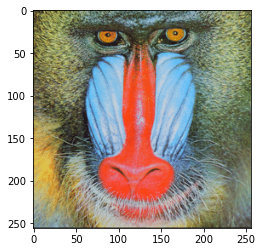

In [2]:
image_plot = plt.imshow(img)
plt.show()

## 13.3 좀 더 편리한 이미지 도구는 없을까

OpenCV는 Open Source Computer Vision을 의미하는 이름이며, 실시간 컴퓨터 비전을 위한 라이브러리이다. 파이썬 프로그래밍 환경에서 사용하기 위해서는 opencv-python 패키지를 설치한다.

In [2]:
!pip install opencv-python

원래 OpenCV는 컴퓨터 비전을 위해 만들어졌지만, 현재는 다양한 기계학습 관련 기능도 제공하고 있다.

In [5]:
import cv2

img_gray = cv2.imread('c:\kdt\mandrill.png', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('c:\kdt\mandrill.png', cv2.IMREAD_COLOR)

cv2.imshow('grayscale', img_gray) # 맨드릴 원숭이를 회색조 이미지로 화면에 표시
cv2.imshow('color image', img_color) # 맨드릴 원숭이를 컬러 이미지로 화면에 표시

# 키보드 입력을 기다렸다가 모든 창을 끄고 종료하는 코드, 향후 코드에서는 생략함
cv2.waitKey(0) # 사용자 입력을 기다림
cv2.destroyAllWindows() # 모든 창을 없애고 프로그램 종료

위의 코드를 실행시키면 0을 입력할때 까지 계속 실행함

## 13.4 OpenCV로 이미지 다루어 보자

이미지에 선을 그릴 때 cv2 모듈의 line() 함수를 사용할 수 있다. line() 함수는 매개변수들을 가진다.

cv2.line(이미지, 시작지점 좌표, 끝지점 좌표, 색상, 굵기, 선의 종류, 좌표 시프트)

비슷한 함수로 arrowedLine()도 있다. 이것은 끝지점에 화살표를 달아준다.

In [1]:
# 직선과 화살표 추가
import cv2

img = cv2.imread('c:\kdt\mandrill.png', cv2.IMREAD_COLOR)
cv2.line(img, (0,0), (200,200), (0,0,255), 5) # 직선의 시작점과 끝점, 색상, 두께를 지정함
cv2.arrowedLine(img, (0,200), (200,20), (0,0,255), 5) # 화살표의 시작점, 끝점, 색상, 두께지정
cv2.imshow('lined', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

line()이나 arrowedLine() 대신에 rectangle() 함수를 호출하면 사각형을 그리게된다. 그리고 putText()를 이용하여 글자를 출력할 수도 있다.

In [3]:
# 직선과 사각형 추가
img = cv2.imread('c:\kdt\mandrill.png', cv2.IMREAD_COLOR)
cv2.line(img, (0,0), (200,200), (0,0,255), 5) # 직선의 시작점과 끝점, 색상, 두께를 지정함
cv2.rectangle(img, (0,200), (200,20), (0,0,0), 5) # 사각형의 좌표, 색상을 지정
cv2.imshow('lined', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 직선, 사각형, 글자 추가
img = cv2.imread('c:\kdt\mandrill.png', cv2.IMREAD_COLOR)
cv2.line(img, (0,0), (200,200), (0,0,255), 5) # 직선의 시작점과 끝점, 색상, 두께를 지정함
cv2.rectangle(img, (0,200), (200,20), (0,0,0), 5) # 사각형의 좌표, 색상을 지정
cv2.putText(img, "hello", (70,70), fontFace=2, fontScale=1, color=(0,0,0))
cv2.imshow('lined', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.5 합성 사진을 제작해 보자

사진을 섞어 보려고 할 때 사용할 수 있는 함수는 addWeighted()이다.

image_merged = cv2.addWeighted(image_a, weight_for_a, image_b, weight_for_b)

주의해야 할 점은 두 이미지의 사이즈가 같아야 한다는 것이다. 그렇지 않으면 cv2.ewsize() 함수를 이용하여 두 이미지의 크기를 동일하게 만들고 진행해야 한다.

가중치를 조절하기 위해 OpenCV에서 제공하는 트랙바를 사용할 수 있다.

createTrackbar(조절할 값의 이름, 부착할 창 이름, 최솟값, 최댓값, 변경시 호출될 함수)

In [1]:
import cv2
global img1, img2 # 두 이미지를 프로그램의 전체에서 사용할 수 있도록 함

def on_change_weight(x): # 상단 트랙바 막대가 움직이게 되면 이 함수가 호출된다
    weight = x / 100 # x 값이 0에서 100사이이므로 100으로 나누어 0에서 1사이 값으로 나타난다
    img_merged = cv2.addWeighted(img1, 1-weight, img2, weight, 0)
    cv2.imshow('Display', img_merged)
    
cv2.namedWindow('Display')
cv2.createTrackbar('weight', 'Display', 0, 100, on_change_weight)

img1 = cv2.imread('c:\kdt\green_back.png')
img2 = cv2.imread('c:\kdt\iceberg.png')
img1 = cv2.resize(img1, (300,400))
img2 = cv2.resize(img2, (300,400))

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.6 이미지에 마스크를 씌워볼까

이미지를 비트 단위로 연산하는 일도 가능하다. 대표적인 것을 마스크를 이용하여 이미지의 특정한 부분만 남기거나 사라지게 할 수 있다.

- & : 비트 단위 AND / 두 개의 피연산자의 해당 비트가 모두 1이면 1, 아니면 0
- | : 비트 단위 OR / 두 피연산자의 해당 비트 중 하나라도 1이면 1, 아니면 0
- ^ : 비트 단위 XOR / 두 개의 피연산자의 해당 비트의 값이 같으면 0, 아니면 1

In [4]:
# 배경이미지, 마스크 이미지를 보여줌
import cv2
mask_image = cv2.imread('c:\kdt\mask_circle.png')
back_image = cv2.imread('c:\kdt\iceberg.png')
mask_image = cv2.resize(mask_image, (300,400))
back_image = cv2.resize(back_image, (300,400))

cv2.imshow('mask', mask_image)
cv2.imshow('back', back_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# AND 단위로 합쳐진 이미지가 나타남
# 이미지에 마스크가 겹쳐져서 나타남
mask_ANDed = cv2.bitwise_and(mask_image, back_image) # 마스크와 비트단위 AND 연산
cv2.imshow('mask and', mask_ANDed)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# OR 단위로 합쳐진 이미지가 나타남
# 마스크 위치의 이미지가 나타남
mask_ORed = cv2.bitwise_or(mask_image, back_image) # 마스크와 비트단위 OR 연산
cv2.imshow('mask or', mask_ORed)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# XOR 단위로 합쳐진 이미지가 나타남
# 마스크 위치만 그대로 나타나고, 이외의 부분은 색이 반전되어 나타남
mask_XORed = cv2.bitwise_xor(mask_image, back_image) # 마스크와 비트단위 XOR 연산
cv2.imshow('mask xor', mask_XORed)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.7 원하는 색깔 픽셀만 뽑아 보자

이미지에서 특정한 색상을 가진 픽셀을 뽑아내기 위해서 mandrill.png 파일을 사용한다. 푸른색 픽셀만 추출할 떄는 HSV 방식이 적합하다. 색상은 0도에서 360도로 잡을 때 푸른색은 160도에서 260도 정도의 범위를 차지한다.

이미지에서 색상의 범위를 0에서 360 사이의 정수로 표현하면 한 바이트 이상이 필요하다. 그래서 이미지 파일에서는 이 값을 1/2로 줄여 0도에서 180도 범위로 표현한다.

In [2]:
import numpy as np
import cv2

image = cv2.imread('c:\kdt\mandrill.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blue_low = np.array([80, 0, 0])
blue_high = np.array([130, 255, 255])

이미지에서 범위에 있는 픽셀들은 1, 그렇지 않은 픽셀은 0으로 표시한 이미지를 뽑아내려고 할 떄 inRange 함수를 이용한다.

In [3]:
my_mask = cv2.inRange(image_hsv, blue_low, blue_high)

이러한 방식으로 추출한 이후에 원래의 이미지와 추출된 이미지를 비교해 볼 수 있다.

In [4]:
cv2.imshow('original', image)
cv2.imshow('mask', my_mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

흑백이미지에서 흰색 부분은 원래 이미지에서 푸른색을 띈 곳이다. 추출한 이미지를 마스크로 이용하여 원래의 이미지에서 푸른색 픽셀만 골라낼 수 있다.

In [5]:
extracted = cv2.bitwise_and(image, image, mask = my_mask)
cv2.imshow('extracted', extracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

컬러를 가진 이미지와 흑백이미지가 가진 채널의 수가 다르면 배열의 크기가 다르기 때문에 오류가 발생한다.

## 13.8 이미지에 필터를 씌워 보자

이미지를 조작할 때 사용하는 방법 중에 커널이라고 불리는 작은 행렬을 사용하여 필터링하는 방법이 있다.

간단한 필터링은 하나의 픽셀을 값을 변경할 때 주위의 값을 고려하여 평균을 취하는 방법이다. 이러한 처리를 이미지 흐림이라고 한다.

커널을 생성하고 싶으면 넘파이를 이용하여 행렬을 만들면 된다.

In [6]:
import numpy as np
kernel = np.ones((3,3), np.float32)/9

커널을 특정 이미지에 적용하는 방법은 filter2D() 함수를 사용하는 것이다.

filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderTrype]]]])

처음에 변경할 이미지가 입력되고, ddepth는 이미지 깊이로 -1을 주면 주어진 입력 이미지와 동일한 값이 된다. 그리고 커널 행렬을 입력한다.

averaged = cv2.filter2D(img, -1, kernel)

3*3 행렬의 커널은 9개 픽셀의 평균으로 픽셀 값을 정한다.

In [9]:
# 원본 이미지를 나타냄
import numpy as np
import cv2

org = cv2.imread('c:\kdt\mandrill.png', 1)
cv2.imshow('original', org)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 원본 이미지에 약간 흐리게 필터를 적용
kernel1 = np.ones((3,3), np.float32) / 9 # 주변 8개의 픽셀과의 평균을 구함
averaged33 = cv2.filter2D(org, -1, kernel1)
cv2.imshow('filtered1', averaged33)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# 원본 이미지에 조금 더 흐리게 필터를 적용
kernel2 = np.ones((9,9), np.float32) / 81 # 주변 80개의 픽셀과의 평균을 구함
averaged99 = cv2.filter2D(org, -1, kernel2)
cv2.imshow('filtered2', averaged99)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.9 OpenCV로 이미지 필터링하기

OpenCV에는 다양한 필터를 적용할 수 있는 함수들이 있다. 이미지의 잡음을 줄이는 블러링을 위해서 여러 종류의 필터를 적용할 수 있다. 대표적인 필터가 가우스 필터를 적용하는 가우시안 흐림이다.

가우스 필터는 커널 영역의 모든 픽셀에 동일한 중요성을 부여하는 것이 아니라 중심 픽셀에는 더 높은 중요도를 부여하고, 중심에서 멀어질 수록 중요성을 낮게 한다. 이 중요도를 가중치라고 부르고, 더하는 것을 가중합이라고 한다. 가우스 함수는 종 모양 함수 혹은 정규분포 함수로 잘 알려져 있다.

OpenCV는 가우스 필터를 자동으로 생성하여 적용할 수 있는 GaussianBlur() 함수를 제공한다.

dst = cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

dst = cv.GaussianBlur(입력 이미지, 커널의 크기, sigmaX[, dst[, sigmaY[, borderType]]])

첫 매개변수 src는 입력 이미지이고, ksize는 커널의 크기이다. 세 번째 매개변수 sigmaX는 x축 방향으로의 정규분포 표준편차이다. 이 값에 따라 가우스 함수의 모양이 달라진다. 네 번째 매개변수는 선택적으로 사용할 수 있는 것으로 dst는 결과가 출력될 이미지, sigmaY는 y축 표준편차이다.

상자 필터와 비슷한 효과를 얻으려면 sigmaX를 큰 값으로 설정하면 된다.

In [13]:
# 원본이미지를 표시
import numpy as np
import cv2

org = cv2.imread('c:\kdt\mandrill.png', 1)
cv2.imshow('original', org)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 원본 이미지에 3x3 크기의 커널 사용
averaged33 = cv2.GaussianBlur(org, (3,3), 1)
cv2.imshow('Gaussian 33', averaged33)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# 원본 이미지에 9x9 크기의 커널 사용
averaged99 = cv2.GaussianBlur(org, (9,9), 1)
cv2.imshow('Gaussian 99', averaged99)

cv2.waitKey(0)
cv2.destroyAllWindows()

이전에 비해서 부드러운 느낌이 들기는 하지만 원본 이미지의 상이 크게 왜곡없이 나타남을 확인할 수 있다.

## 13.10 다양한 흐림 필터로 잡음을 제거해 보자

이미지를 원본보다 더 흐리게 만드는 일은 잡음을 제거하는 방법으로 널리 사용된다.

mediaBlur()는 중앙값 흐림을 수행하는 함수로, 두 개의 매개변수를 갖는데, 첫 번째는 입력 이미지이고, 두 번째는 정수 n을 인자로 받는다. 그러면 nxn 크기의 필터 영역에서 중앙값을 찾아 그 값으로 픽셀을 설정하는 것이다.

이 흐림 효과는 이미지에서 주위에 비해 튀는 작은 점들을 지우는 데에 효과적이다. 이런 작은 점과 같은 잡음을 소금과 후추 잡음이라고 한다.

In [18]:
# 원본 이미지를 보여줌
original_image = cv2.imread('c:\kdt\salt_pepper.png', 0)
cv2.imshow('original', original_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# 원본 이미지를 소금과 후추 잡음을 제거함
result_image = cv2.medianBlur(original_image, 5)
cv2.imshow('salt_pepper', result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

bilateralFilter()는 두 개의 기준을 고려하는 양방향 필터이다. 이 필터는 공간 커널에 픽셀의 색상값이 얼마나 차이가 나는지를 고려하는 필터를 하나 더 쓰는 것이다. 양방향 필터를 사용하면 잡음을 제거하면서 이미지의 특징은 더 잘 유지할 수 있게 된다.

dst = bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])

dst = bilateralFilter(원본이미지, 커널영역의 지름, 픽셀의 값에 따라 결정되는 필터 사용, 가우스 필터와 같은 공간 필터를 조정)

첫 번째 매개변수는 원본이미지이고, 두 번째 매개변수 d는 필터가 적용되는 커널의 영역의 지름이다. 두 개의 매개변수는 커널 함수의 퍼진 정도를 결정하는데, 두 개의 필터를 사용하므로 각각 하나씩 조절값이 필요하다.

다양한 이미지 흐림 효과들이 계산의 빠르기, 튀는 값은 제거 등과 같은 각각의 장점을 가지고 있지만, 이미지의 원래 특성을 그대로 유지한다는 점에서 양방향 필터는 이미지 인식 등의 분야에서 폭넓은 활용도를 갖고 있는 필터이다.

In [20]:
# 원본이미지
original_image = cv2.imread('c:\kdt\mandrill.png', 1)
cv2.imshow('original', original_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# 가우스 필터
result_image1 = cv2.GaussianBlur(original_image, (9, 9), 1)
cv2.imshow('gauss', result_image1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# 중앙값 필터
result_image2 = cv2.medianBlur(original_image, 9)
cv2.imshow('median', result_image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# 양방향 필터
result_image3 = cv2.bilateralFilter(original_image, 9, 50, 50)
cv2.imshow('bilateralFilter', result_image3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# 위의 4개를 한번에 보기
# 원본 이미지
original_image = cv2.imread('c:\kdt\mandrill.png', 1)
cv2.imshow('original', original_image)

# 가우스 필터
result_image1 = cv2.GaussianBlur(original_image, (9, 9), 1)
cv2.imshow('gauss', result_image1)

# 중앙값 필터
result_image2 = cv2.medianBlur(original_image, 9)
cv2.imshow('median', result_image2)

# 양방향 필터
result_image3 = cv2.bilateralFilter(original_image, 9, 50, 50)
cv2.imshow('bilateralFilter', result_image3)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.11 관심있는 곳만 남겨보자

이미지를 다룰 때, 특정한 임계값 이상인 값은 유효한 값, 그렇지 않은 값은 유효하지 않은 값으로 구분하는 작업이 필요할 때가 있따. 이러한 작업을 이진화라고 한다. 이를 위해서는 OpenCV의 threshold() 함수를 사용한다. 이 함수는 이진화를 할 수도 있고, 특정 임계치를 넘는 값은 일정한 값으로 모두 바꾸는 일을 할 수도 있다.

ret, result_image = threshold(src_image, thresh_value, maxValue, thresh_option)

반환은 튜플로 이루어지며, 첫 번째 값은 사용된 임계값, 두 번째는 임계값을 적용하여 얻은 새로운 이미지가 된다.

- THRESH_BINARY : 조건을 만족하는 픽셀값을 최대값으로, 만족하지 않는 픽셀값을 0으로 설정
- THRESH_BINARY_INV : 조건을 만족하는 픽셀값을 0으로, 만족하지 않는 픽셀값을 최댓값으로 설정
- THRESH_TRUNC : 조건을 만족하는 픽셀값을 최대값으로, 만족하지 않으면 원본 그대로
- THRESH_TOZERO : 조건을 만족하는 픽셀값을 원본값으로, 만족하지 않는 픽셀값을 0으로 설정
- THRESH_TOZERO_INV : 조건을 만족하는 픽셀값을 0으로, 만족하지 않는 픽셀값을 원본값으로 설정

트랙바를 사용하여 임계치를 변경하고, 트랙바에서 얻어온 임계치로 이진화한 뒤 창에 그림을 그린다. 임계값을 높이면 기준을 만족하는 픽셀의 수가 적어지고 적절히 높은 임계치를 주면 밝은 영역만 얻을 수 있다.

In [25]:
import cv2
global color_image, gray_image

# 트랙바가 변경되면 그 값을 임계치로 회색조 이미지를 이진화하여 창에 그림
def on_change_threshold(x):
    _, th_image = cv2.threshold(gray_image, x, 255, cv2.THRESH_BINARY)
    cv2.imshow('Thresholding', th_image)
    
# 원도를 생성함
cv2.namedWindow('Thresholding')
cv2.createTrackbar('threshold', 'Thresholding', 0, 255, on_change_threshold)

# 촛불 이미지를 읽고, 회색조 이미지를 준비함
color_image = cv2.imread('c:\kdt\candles.jpg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# 처음에는 원본 이미지를 그림(트랙바를 변경하면 임계치에 따라 이진화 결과 출력)
cv2.imshow('Thresholding', color_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

구현 결과 트랙바를 조절하여 임계값을 변경할 수 있다. 임계값에 따라 통과하는 픽셀과 그렇지 못한 픽셀의 수가 바뀔 것이다.

임계값을 이용하여 이진화하는 작업을 회색조 이미지에 하지 않고 원본 컬러 이미지에 적용하면 각 채널별로 이진화가 일어나서 몇 가지 색상으로만 이루어진 이미지를 얻을 수도 있다.

In [28]:
def on_change_threshold(x):
    _, th_image = cv2.threshold(color_image, x, 255, cv2.THRESH_BINARY)
    cv2.imshow('Thresholding', th_image)

# 원도를 생성함
cv2.namedWindow('Thresholding')
cv2.createTrackbar('threshold', 'Thresholding', 0, 255, on_change_threshold)

# 촛불 이미지를 읽고, 회색조 이미지를 준비함
color_image = cv2.imread('c:\kdt\candles.jpg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# 처음에는 원본 이미지를 그림(트랙바를 변경하면 임계치에 따라 이진화 결과 출력)
cv2.imshow('Thresholding', color_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.12 윤곽선을 더 잘 뽑아 낼 수 있을까

고정된 임계값이 아니라 주변 픽셀들이 가진 값을 기준으로 임계값을 정할 때도 있다. 대표적인 예가 윤곽선을 찾는 것이다. 윤관선이라는 것은 주위에 비해 튀는 값을 가진 픽셀이다. 즉 주변 값에 따라 임계값을 정해야 한다. 이런 임계값을 적응적 임계값이라 한다. 이런 문제에서 사용할 수 있는 함수가 adaptiveTreshold()이다.

cv2.adaptiveTreshold(img, value, method, thresholdType, blocksize, C)

cv2.adaptiveTreshold(입력 이미지, 픽셀에 적용할 최대값, 임계치를 결정하는 방법, thresholdType, 평균값을 구하는 범위를 결정, 임계치를 보정하는 데에 사용)

- ADAPTIVE_THRESH_MEAN_C : 픽셀 중심으로 blocksize x blocksize 구역 내의 픽셀 평균 값, C(마지막 인자)를 임계치로 함
- ADAPTIVE_THERESH_GAUSSIAN_C : 픽셀 중심으로 blocksize x blocksize 구역 내의 픽셀에 가우스 가중치를 적용한 평균값에서 C(마지막 인자) 값을 뺀 값을 임계치로 함. 가우스 가중치를 적용하므로 현재 검사하는 픽셀에서 가까운 픽셀이 더 중요하게 취급 됨

In [29]:
# image를 회색조로 읽어들인다
img_gray = cv2.imread('c:\kdt\green_back.png', cv2.IMREAD_GRAYSCALE)

# adaptiveThreshold를 적용한다
# 주변 9x9 픽셀 공간의 평균값 - 5가 임계치가 되고, 이보다 크면 255, 그렇지 않으면 0
img_edge = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=0)

# 결과는 윤곽선 픽셀이 드러난다
cv2.imshow('edge', img_edge)

cv2.waitKey(0)
cv2.destroyAllWindows()

위의 식에서는 C=0으로 되어있는데 이 값을 수정하면 다양하게 나타난다. C값이 작을수록(음수도 가능) 검정 바탕에 흰 윤곽선으로 나타나고, C값이 커질수록 흰 바탕에 검정 윤곽선으로 나타난다.

## LAB 13-1 합성 사진 만들기 2

In [6]:
import numpy as np
import cv2

img1 = cv2.imread('c:\kdt\green_back.png') # 전경 이미지 읽기
img2 = cv2.imread('c:\kdt\iceberg.png') # 배경 이미지 읽기

front_image = cv2.resize(img1, (300, 400))
back_image = cv2.resize(img2, (300, 400))

img_hsv = cv2.cvtColor(front_image, cv2.COLOR_BGR2HSV) # HSV 공간으로 옮김
l_bound = np.array([40, 100, 50]) # 녹색 색상 하한
u_bound = np.array([80, 255, 255]) # 녹색 색상 상한

my_mask = cv2.inRange(img_hsv, l_bound, u_bound) # 녹색 픽셀 찾기
mask_inv = cv2.bitwise_not(my_mask) # 녹색이 아닌 픽셀 찾기

# 녹색 픽셀들만 추출하기
extracted = cv2.bitwise_and(front_image, front_image, mask=my_mask)
# 녹색 아닌 픽셀만 추출하기
removed = cv2.bitwise_and(front_image, front_image, mask=mask_inv)
# 녹색과 겹치는 배경 추출하기
background = cv2.bitwise_and(back_image, back_image, mask=my_mask)
# 녹색 제거 전경 + 배경 추출하기
merged = cv2.bitwise_or(removed, background)

cv2.imshow('mask', my_mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('removed', removed)
cv2.imshow('background', background)
cv2.imshow('merged', merged)

cv2.waitKey(0)
cv2.destroyAllWindows()

## LAB 13-2 텍스트 데이터 추출을 위한 준비

In [4]:
# 단순 이진화를 통해 얻은 텍스트 추출
img = cv2.imread('c:/kdt/book.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

cv2.imshow('gray', gray)
cv2.imshow('binary', thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# 양방향 필터 적용
import numpy as np
import cv2

img = cv2.imread('c:/kdt/book.png')

# 잡음은 제거하면서 특징을 유지할 수 있는 양방향 필터 적용
blur_bilateral = cv2.bilateralFilter(img, 11, 75, 75)

# 회색조로 변환
gray_img = cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2GRAY)

# 인근 픽셀과 비교한 이진화
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)

cv2.imshow('original', img)
cv2.imshow('bilateral', blur_bilateral)
cv2.imshow('gray', gray_img)
cv2.imshow('binary', thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 텍스트만 추출된 결과 이미지
import cv2

img = cv2.imread(r'c:\kdt\book.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 잡음은 제거하면서 특징은 유지할 수 있는 양방향 필터 적용
blur_bilateral = cv2.bilateralFilter(img, 11, 75, 75)

# 회색조로 변환
gray = cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2GRAY)

# 인근 픽셀과 비교한 이진화
thresh = cv2.adaptiveThreshold(gray, 255,
         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)

gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)

cv2.imshow('result',thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 핵심 정리

- 이미지는 비트맵 방식과 벡터 그래픽 방식이 있다
- 이미지의 색을 결정하는 방식은 회색조, RGB, BGR, HSV 등이 있다
- 색상을 기반으로 특징을 추출하는 데에는 HSV 방식이 여러 측면에서 편리하다
- 이미지는 넘파이의 배열로 읽어 들여 다룰 수 있다
- 이미지 처리에 특화된 다양한 모듈이 있는데 OpenCV는 그 중 가장 강력한 모듈 중 하나이다
- OpenCV는 이미지 마스킹, 필터링, 블러링을 위한 풍부한 함수를 제공한다.